## 0. Importing external modules

In [13]:
## magics

%load_ext version_information 
%version_information numpy,xarray,netCDF4


The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.11 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.2.0
OS Linux 3.16.0 4 amd64 x86_64 with debian 8.5
numpy 1.11.2
xarray 0.9.1
netCDF4 1.2.4
Mon May 28 13:40:41 2018 CEST

In [14]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")

In [15]:
## imports

import numpy as np
import xarray as xr
import GriddedData
import time

In [16]:
#- Other modules
import numpy.ma as ma
import WavenumberSpectrum as ws

### palette
import matplotlib.cm as mplcm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf
%matplotlib inline

In [17]:
dirin="/media/extra/DATA/NATL60/NATL60-I/"
gridfile=dirin+"NATL60_v4.1_cdf_mesh_hgr.nc"
!ls $gridfile
grid=xr.open_dataset(gridfile)
navlat= np.squeeze(grid['nav_lat'])
navlon= np.squeeze(grid['nav_lon'])


/media/extra/DATA/NATL60/NATL60-I/NATL60_v4.1_cdf_mesh_hgr.nc


In [18]:
def fine_scale_variance(files):
    ''' from a list of files containing one month of data compute variance and average in 1°x1°x1 month boxes
    '''
    hpcurl = xr.open_mfdataset(files,concat_dim='time_counter',decode_times=False)['socurloverf_filt']
    hpcurl2 = hpcurl ** 2
    hpcurl2m = hpcurl2.mean(axis=0,keep_attrs=True)
    navlat2=np.array(navlat).squeeze()
    navlon2=np.array(navlon).squeeze()
    mgrd = GriddedData.grid2D(navlat=navlat2, navlon=navlon2)
    crs = GriddedData.grdCoarsener(mgrd,crs_factor=60)
    hpcurl2mc = crs.return_ravel(np.asarray(hpcurl2m))
    hpcurl2mcm = np.mean(hpcurl2mc,axis=-3)
    latcrs=crs.return_ravel(np.asarray(navlat2))
    loncrs=crs.return_ravel(np.asarray(navlon2))
    latcrsm=np.mean(latcrs,axis=-3)
    loncrsm=np.mean(loncrs,axis=-3)
    return loncrsm,latcrsm,hpcurl2mcm,hpcurl2m



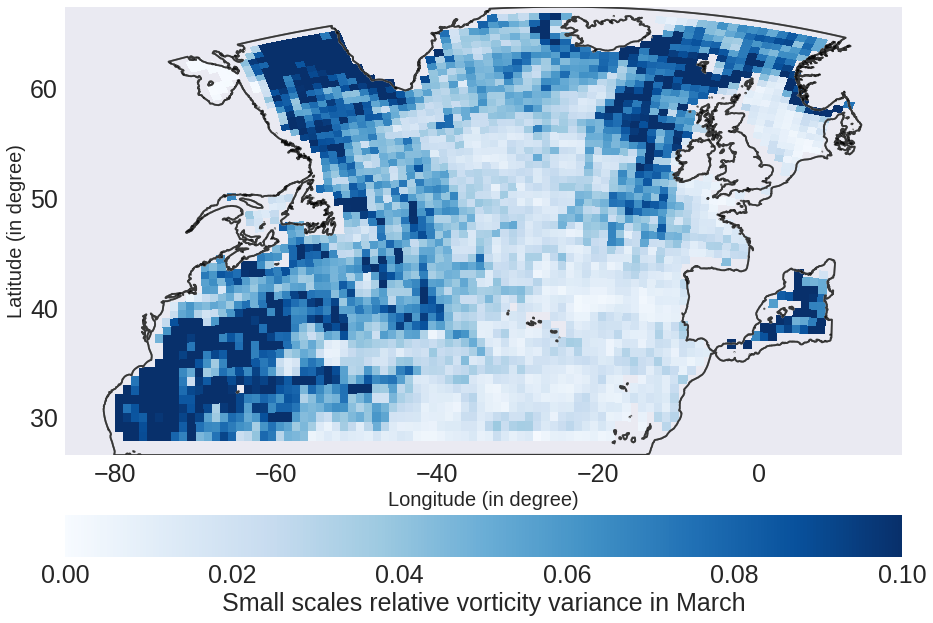

In [20]:
dir="/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/"

filt_files03="NATL60-CJM165_y2013m03d*.1d_curloverf_filt-n80-f0.0125.nc"
tf_files03=dir+filt_files03
loncrsm03, latcrsm03, boxvarcurl03, hpvarm03 = fine_scale_variance(tf_files03)
plot_fine_scale_variance(boxvarcurl03,loncrsm03, latcrsm03,navlon,navlat,hpvarm03,'March')

/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d01.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d02.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d03.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d04.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d05.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d06.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d07.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d08.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d09.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM16

/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d01.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d02.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d03.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d04.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d05.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d06.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d07.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d08.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m04d09.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM16

/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d01.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d02.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d03.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d04.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d05.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d06.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d07.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d08.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m07d09.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM16

/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d02.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d03.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d04.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d05.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d06.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d07.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d08.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d09.1d_socurloverf_filt-n80-f0.0125.nc
/media/extra/DATA/NATL60/NATL60-CJM16

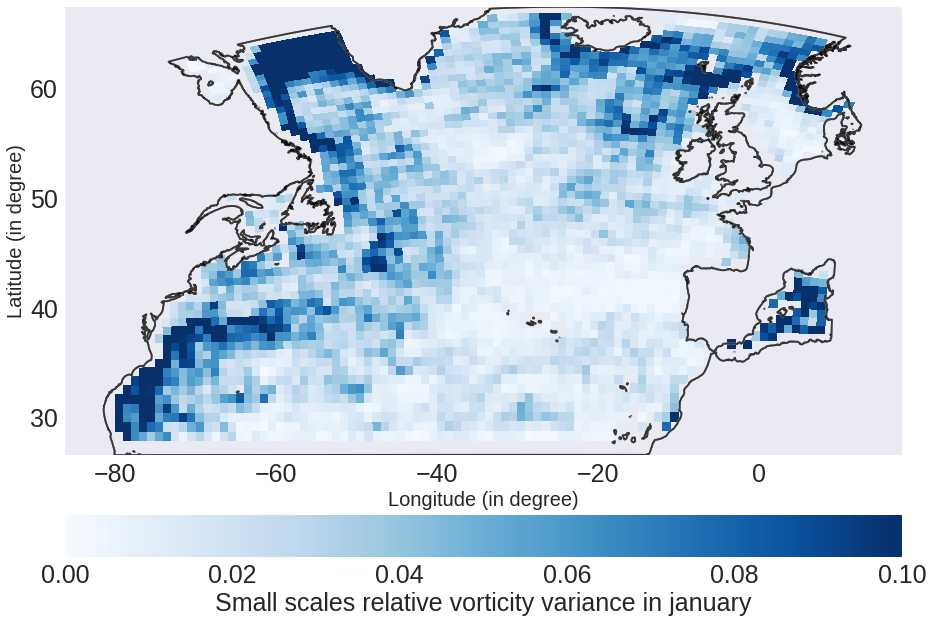

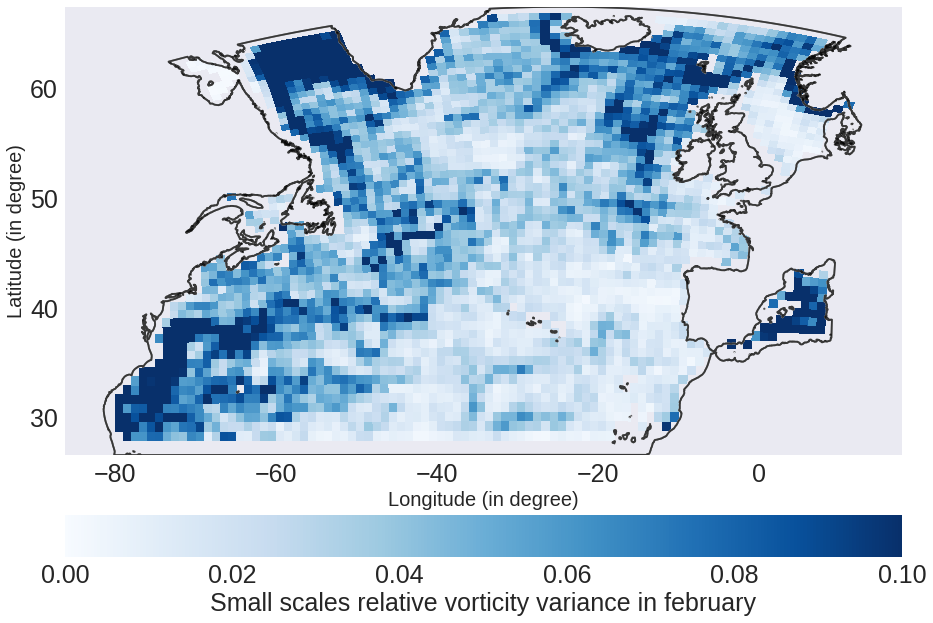

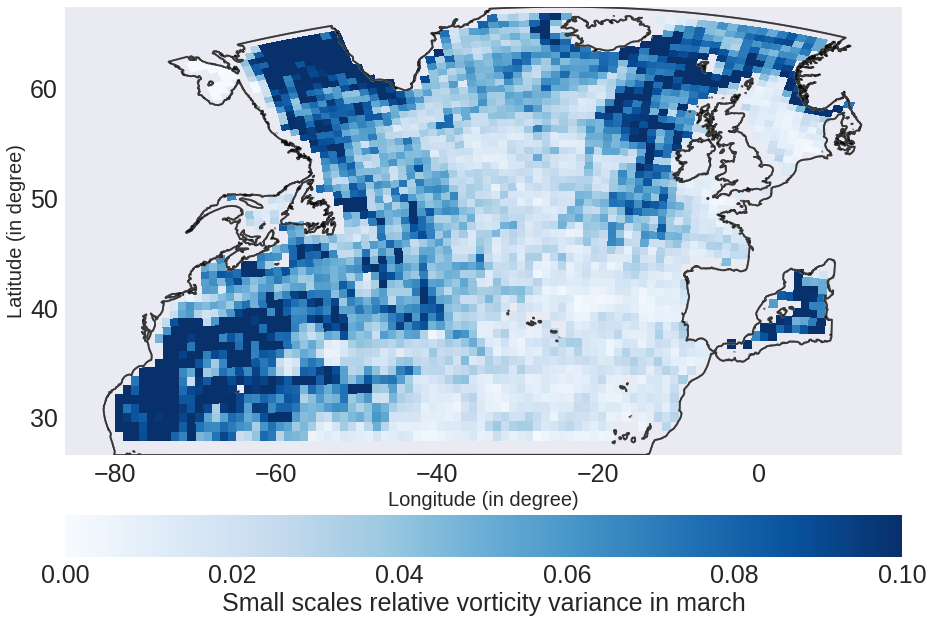

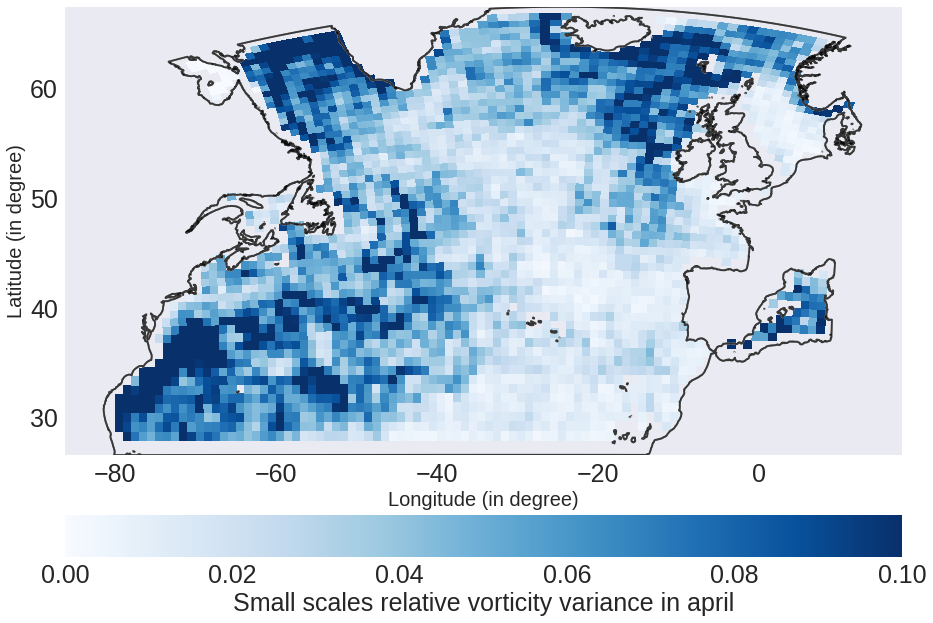

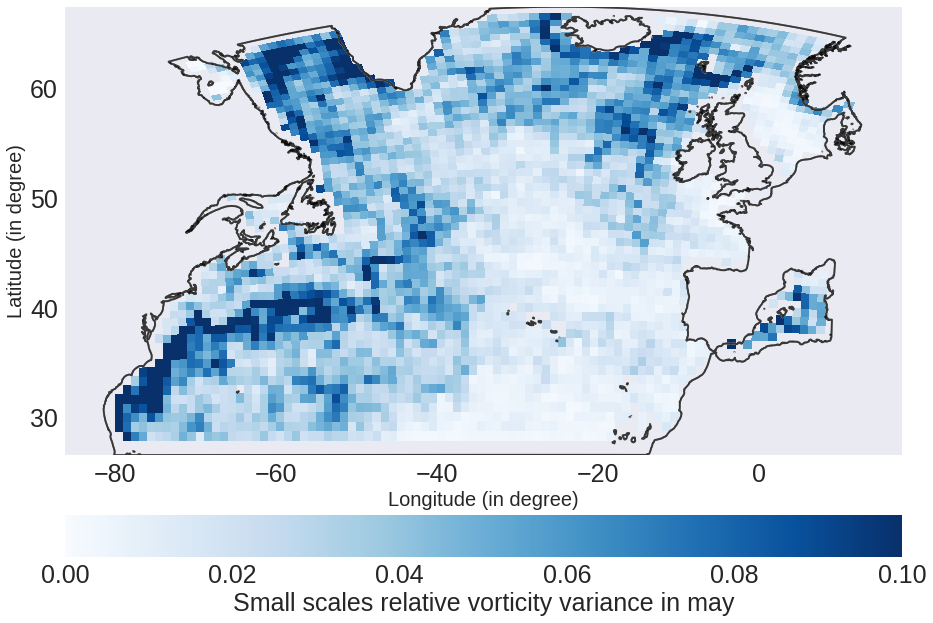

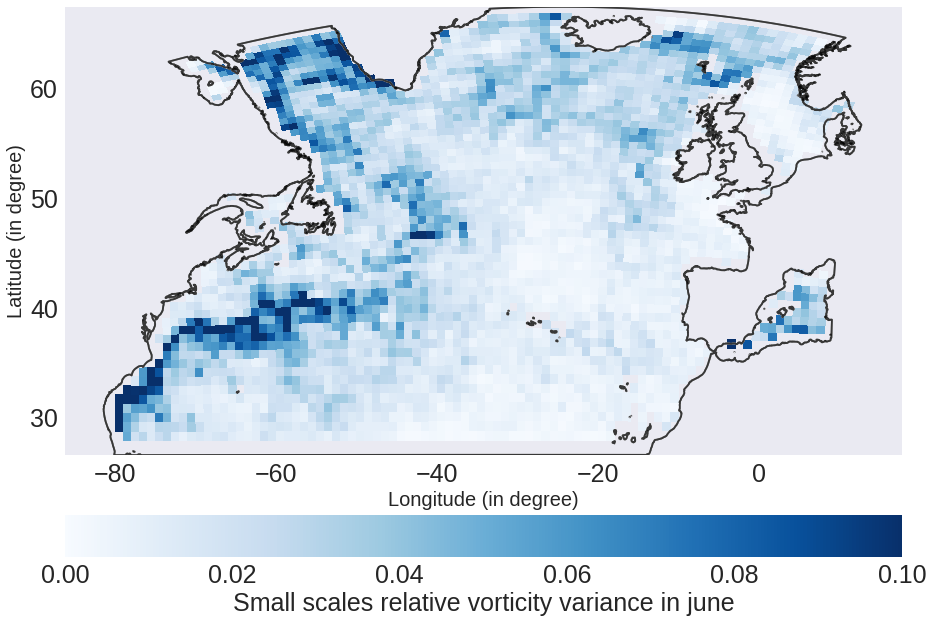

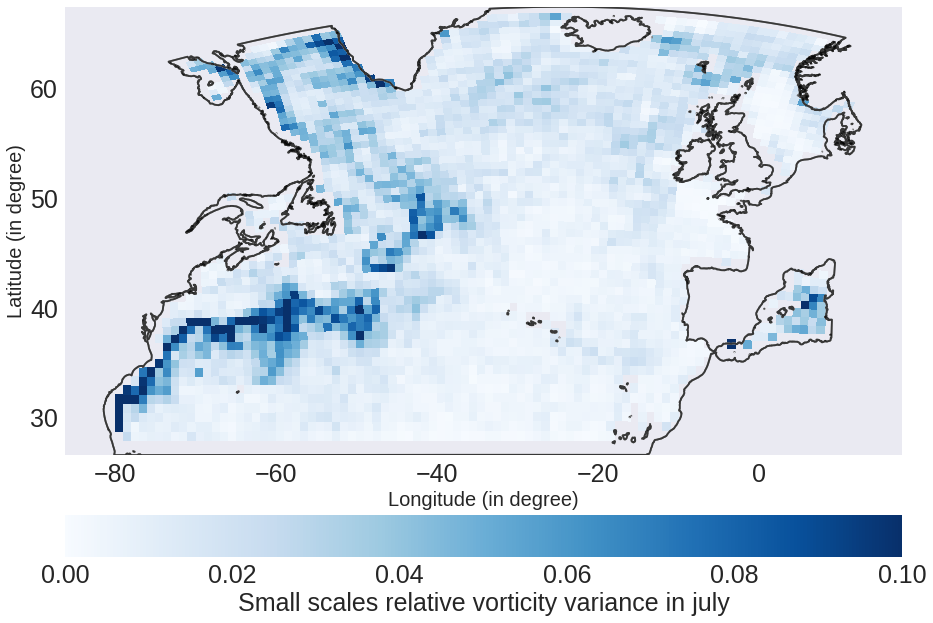

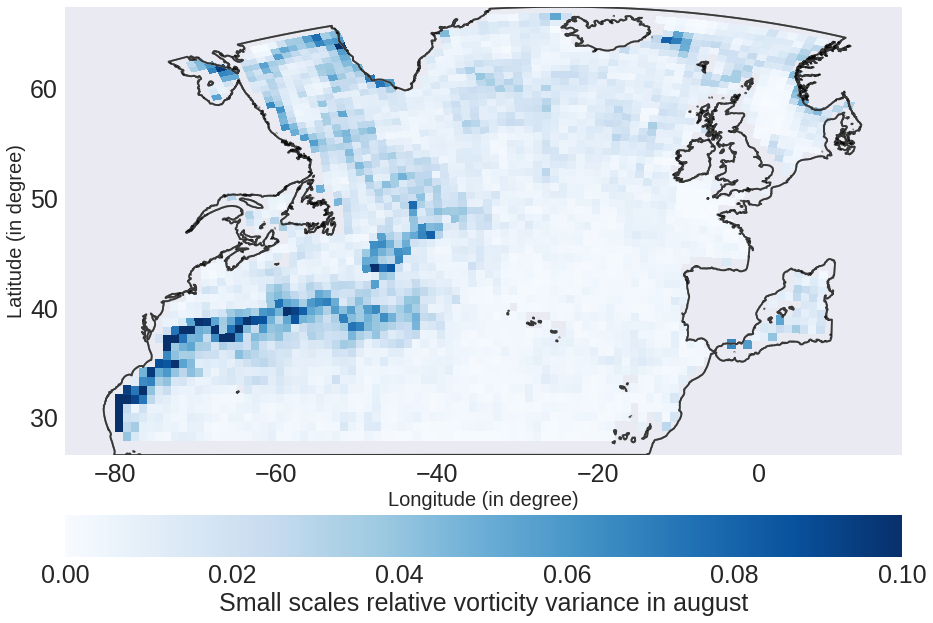

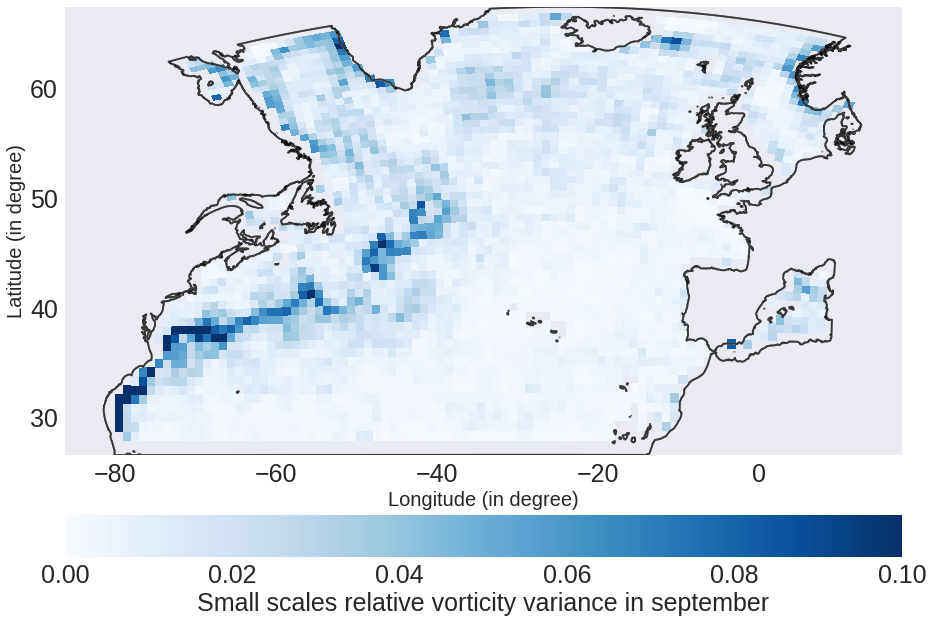

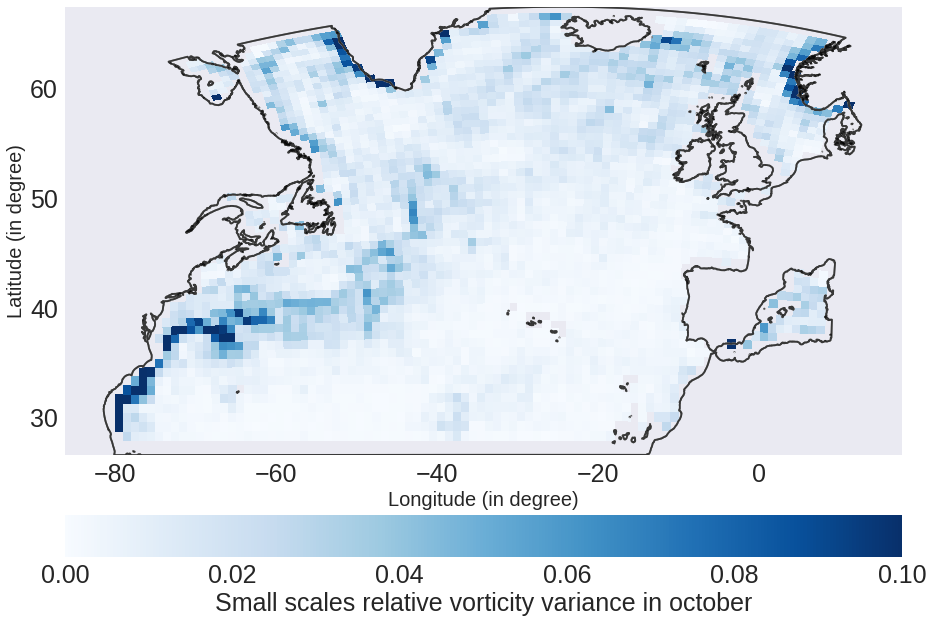

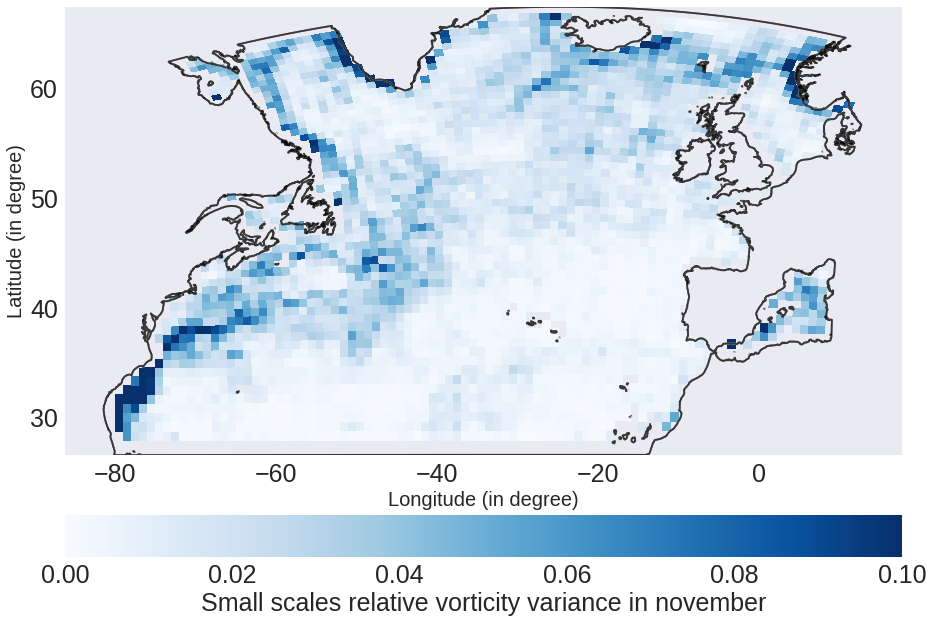

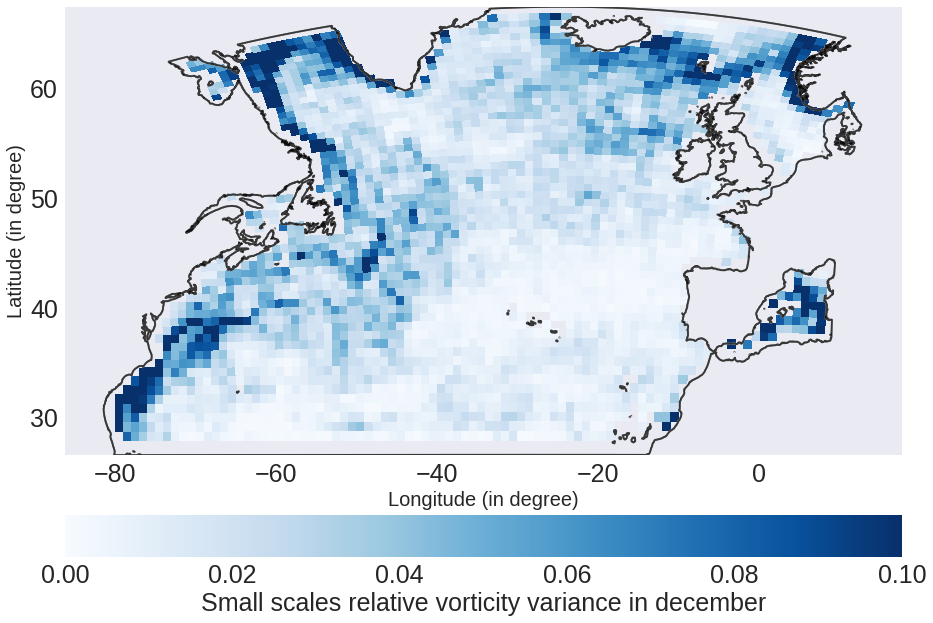

In [21]:
dir="/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/"

for mm in np.arange(12):
    month = {1 : 'january',
           2 : 'february',
           3 : 'march',
           4 : 'april',
           5 : 'may',
           6 : 'june',
           7 : 'july',
           8 : 'august',
           9 : 'september',
           10 : 'october',
           11 : 'november',
           12 : 'december',
    }
    
    m=str(mm+1).zfill(2)
    if mm <9:
        year='2013'
    else:
        year='2012'
    filt_files='NATL60-CJM165_y'+year+'m'+str(m)+'d*.1d_socurloverf_filt-n80-f0.0125.nc'
    tf_files=dir+filt_files
    loncrsm, latcrsm, boxvarcurl, hpvarm = fine_scale_variance(tf_files)
    plot_fine_scale_variance(boxvarcurl,loncrsm, latcrsm,navlon,navlat,hpvarm,month[mm+1])

In [27]:
def plot_from_file(mm):

    dir="/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/"
    month = {1 : 'january',
           2 : 'february',
           3 : 'march',
           4 : 'april',
           5 : 'may',
           6 : 'june',
           7 : 'july',
           8 : 'august',
           9 : 'september',
           10 : 'october',
           11 : 'november',
           12 : 'december',
    }
    
    m=str(mm+1).zfill(2)
    if mm <9:
        year='2013'
    else:
        year='2012'
    filt_files='NATL60-CJM165_y'+year+'m'+str(m)+'d*.1d_socurloverf_filt-n80-f0.0125.nc'
    tf_files=dir+filt_files
    loncrsm, latcrsm, boxvarcurl, hpvarm = fine_scale_variance(tf_files)
    fig=plot_fine_scale_variance(boxvarcurl,loncrsm, latcrsm,navlon,navlat,hpvarm,month[mm+1]);
    return fig

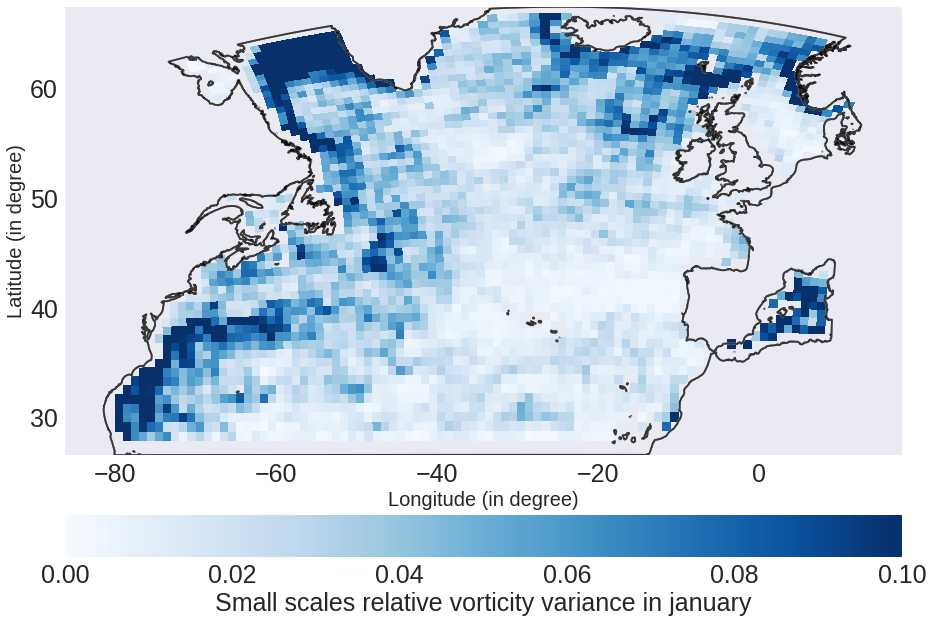

In [28]:
plot_from_file(0)

In [29]:
def plot_fine_scale_variance(fig,var,loncrs,latcrs,lon,lat,hpvarm,month):
    ''' map of the averaged fine scale variance
    '''
    ax = plt.subplot(111)
    ax.autoscale(tight=True)
    cont=np.isnan(hpvarm)

    pcolor = ax.pcolormesh(loncrs,latcrs,ma.masked_invalid(var),cmap=seq_cmap,vmin=0,vmax=0.1,alpha=1)
    ax.tick_params(labelsize=25)
    ax.contour(lon,lat,cont,alpha=0.5,linewidth=0.000001,antialiased=True)
    cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.1)
    cbar.ax.tick_params(labelsize=35)
    ax.set_xlabel('Longitude (in degree)',fontsize=20)
    ax.set_ylabel('Latitude (in degree)',fontsize=20)
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label('Small scales relative vorticity variance in '+month,fontsize=25)
    plt.savefig('fine_scale_variance_socurloverf_NATL60-CJM165_'+month+'.png')
    return fig

def plot_from_file(fig,mm):

    dir="/media/extra/DATA/NATL60/NATL60-CJM165-S/filt/"
    month = {1 : 'january',
           2 : 'february',
           3 : 'march',
           4 : 'april',
           5 : 'may',
           6 : 'june',
           7 : 'july',
           8 : 'august',
           9 : 'september',
           10 : 'october',
           11 : 'november',
           12 : 'december',
    }
    
    m=str(mm+1).zfill(2)
    if mm <9:
        year='2013'
    else:
        year='2012'
    filt_files='NATL60-CJM165_y'+year+'m'+str(m)+'d*.1d_socurloverf_filt-n80-f0.0125.nc'
    tf_files=dir+filt_files
    loncrsm, latcrsm, boxvarcurl, hpvarm = fine_scale_variance(tf_files)
    fig=plot_fine_scale_variance(fig,boxvarcurl,loncrsm, latcrsm,navlon,navlat,hpvarm,month[mm+1]);
    return fig

from matplotlib import animation, rc
from IPython.display import HTML


fig = plt.figure(figsize=(20, 15))
ims = []
for i in range(12):
    im = plot_from_file(fig,0)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False, repeat=False)
plt.close()

HTML(ani.to_jshtml())



AttributeError: 'ArtistAnimation' object has no attribute 'to_jshtml'